In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

In [15]:
# Upload the image
uploaded = files.upload()

Saving gutters1.JPG to gutters1 (2).JPG
Saving gutters2.JPG to gutters2 (2).JPG
Saving gutters3.JPG to gutters3 (2).JPG


Enter image number:2


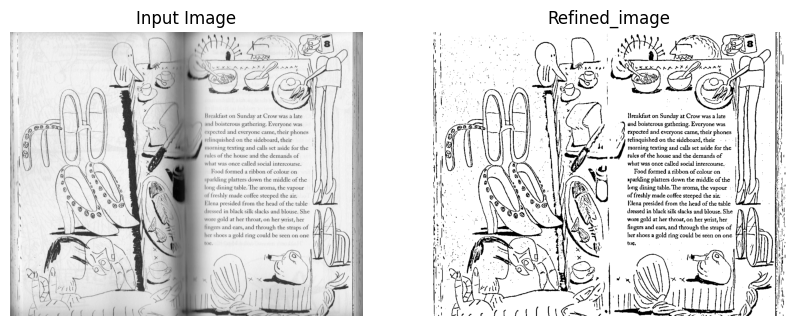

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_shadow(img_path):
    # Apply shadow removal logic to single plane
    dilated_image = cv2.dilate(image, np.ones((5, 5), np.uint8))
    background_image = cv2.medianBlur(dilated_image, 31)
    diff_image = 255 - cv2.absdiff(image, background_image)
    norm_image = cv2.normalize(diff_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    return norm_image

x=int(input("Enter image number:"))
if(x==1):
  input_image = "gutters1.JPG"
elif(x==2):
  input_image = "gutters2.JPG"
elif(x==3):
  input_image = "gutters3.JPG"

image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)  # reading in grayscale mode
output_image = remove_shadow(image)

# Apply Gaussian thresholding to the output image
block_size = 31
constant = 10
gaussian_thresh = cv2.adaptiveThreshold(output_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

cv2.imwrite('Refined_image.jpg', gaussian_thresh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title('Input Image')
ax1.axis('off')
ax2.imshow(gaussian_thresh, cmap='gray')
ax2.set_title('Refined_image')
ax2.axis('off')
plt.show()
